Adopted from https://opendatascience.com/transforming-skewed-data-for-machine-learning/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

In [2]:
df = pd.read_csv('data/train.csv')

df.dropna(axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.drop(['Id'], axis=1, inplace=True)

y = df['SalePrice'].values

# Detecting Skewness

### Visually

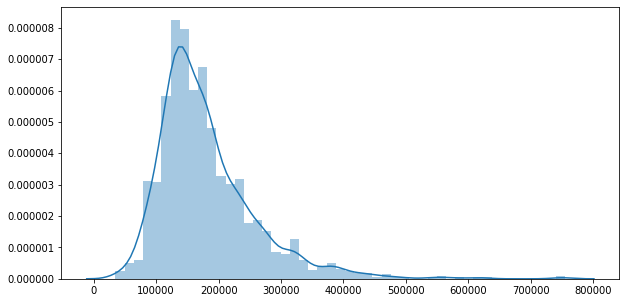

In [3]:
plt.figure(figsize=(10,5))
sns.distplot(y);

The data is right skewed, meaning there are a minority of very large values.

If the response variable is skewed, the model will be trained on a much larger number of moderately priced homes, and will be less likely to successfully predict the price for the most expensive houses. The concept is the same as training a model on imbalanced categorical classes. 

If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

### Shapiro-Wilks test.

Shapiro-Wilks test is used to objectively determine if the variable is skewed.

The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness. 

In [4]:
shapiro(y)[1]

3.206247534576162e-33

### Fisher–Pearson Standardized Moment Coefficient

A more convenient way of evaluating skewness for pandas dataframe.

In [5]:
numerical_columns = df.dtypes[df.dtypes != 'object'].index

skew_scores = df[numerical_columns].skew().sort_values(ascending=False)
skew_scores

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
dtype: float64

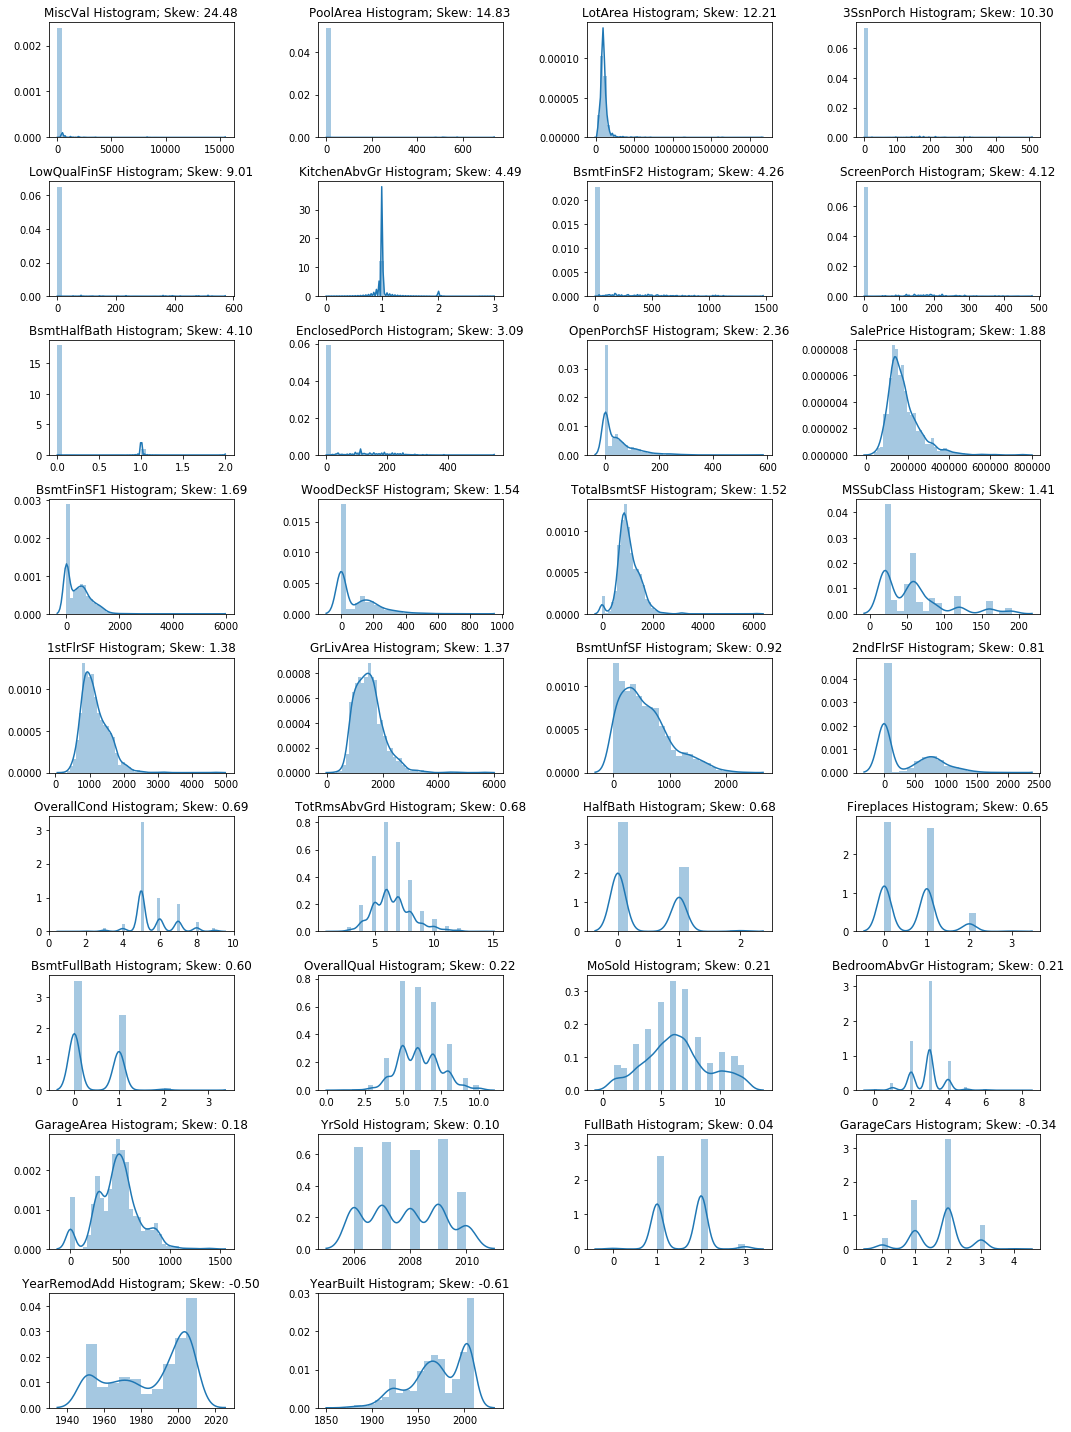

In [6]:
plt.figure(figsize=(15, 20))

N_COLS = 4
N_ROWS = len(numerical_columns) // N_COLS
offset = len(numerical_columns) - N_ROWS*N_COLS
N_ROWS += N_ROWS*N_COLS < len(numerical_columns)

for i in range(N_ROWS * N_COLS - offset):
    ax = plt.subplot(N_ROWS, N_COLS, i+1)
    sns.distplot(df[skew_scores.index[i]].dropna().values);

    ax.set_title('{0} Histogram; Skew: {1:0.2f}'.format(skew_scores.index[i], skew_scores[i]))

plt.tight_layout()

# Fixing Skewed Data

### Applying Square Root

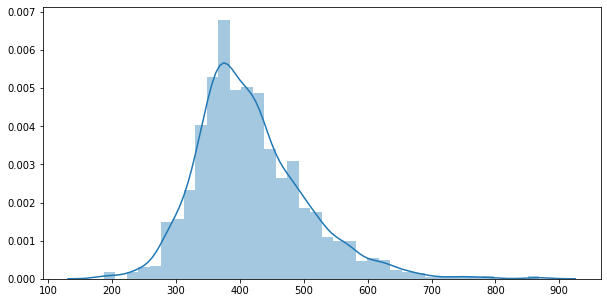

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(y**0.5);

In [8]:
shapiro(y**0.5)[1]

1.1143702087512663e-20

The data is definitely less skewed, but there is still a long right tail.

### Reciprocal Transformation

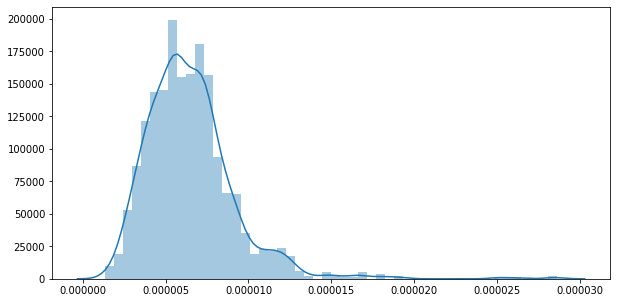

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(1/y);

In [10]:
shapiro(1/y)[1]

4.127902696546008e-33

The distribution is not quite symmetrical.

### Log Transformation

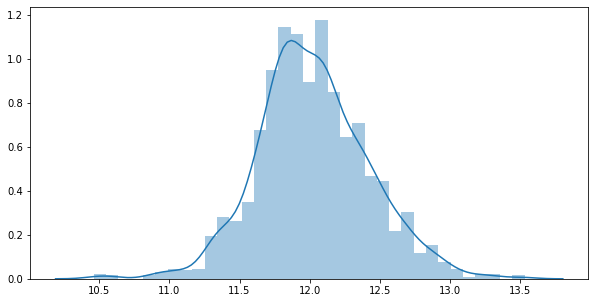

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(y));

In [12]:
shapiro(np.log(y))[1]

1.1490678986092462e-07

The log transformation seems to be the best, as the distribution of transformed sale prices is the most symmetrical.

### Box Cox Transformation

It is an alternative to manually trying a variety of transformations.

For each variable, a Box Cox transformation estimates the value lambda from -5 to 5 that maximizes the normality of the data.

In [13]:
from scipy.stats import boxcox

In [14]:
for col in numerical_columns:
    df[col], lmbda = boxcox(df[col] + np.abs(df[col].min()) + 0.00000000001, lmbda=None)

C:\Users\victor\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\victor\Anaconda3\lib\site-packages\scipy\stats\morestats.py:902: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\victor\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\victor\Anaconda3\lib\site-packages\scipy\stats\morestats.py:902: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\victor\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\victor\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1936: RuntimeWarning: invalid value encountered 

In [15]:
skew_scores = df[numerical_columns].skew().sort_values(ascending=False)
skew_scores

C:\Users\victor\Anaconda3\lib\site-packages\pandas\core\nanops.py:865: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\victor\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\victor\Anaconda3\lib\site-packages\pandas\core\nanops.py:877: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2 ** 1.5)


PoolArea         14.352680
3SsnPorch         7.613746
LowQualFinSF      7.299413
MiscVal           5.016528
BsmtHalfBath      3.859402
ScreenPorch       3.113266
BsmtFinSF2        2.425646
EnclosedPorch     2.047921
KitchenAbvGr      1.902498
HalfBath          0.518453
BsmtFullBath      0.350860
2ndFlrSF          0.274335
MSSubClass        0.117178
WoodDeckSF        0.086745
OverallCond       0.032376
OverallQual       0.018233
1stFlrSF          0.000764
SalePrice         0.000000
YrSold            0.000000
TotRmsAbvGrd     -0.001010
GrLivArea        -0.002893
MoSold           -0.039399
LotArea          -0.076737
Fireplaces       -0.108937
OpenPorchSF      -0.196805
BedroomAbvGr     -0.283489
FullBath         -0.415131
BsmtFinSF1       -0.731281
TotalBsmtSF      -1.330026
BsmtUnfSF        -1.503897
GarageCars       -2.014202
GarageArea       -2.154680
YearBuilt              NaN
YearRemodAdd           NaN
dtype: float64

C:\Users\victor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\victor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\victor\Anaconda3\lib\site-packages\numpy\core\_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


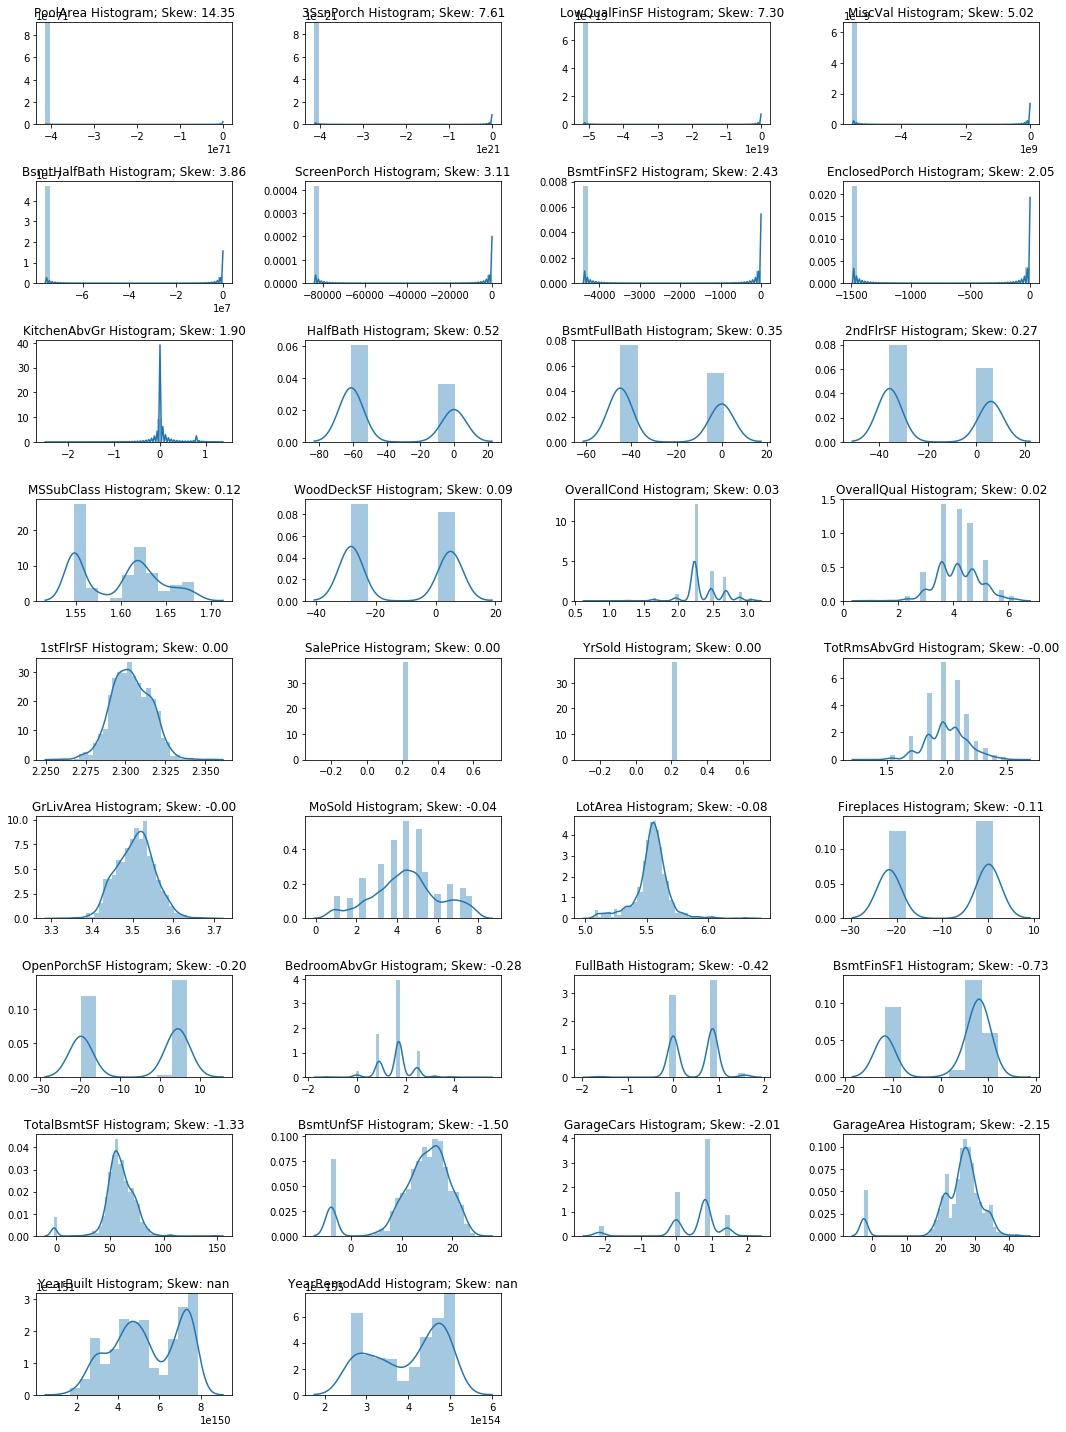

In [16]:
plt.figure(figsize=(15, 20))

N_COLS = 4
N_ROWS = len(numerical_columns) // N_COLS
offset = len(numerical_columns) - N_ROWS*N_COLS
N_ROWS += N_ROWS*N_COLS < len(numerical_columns)

for i in range(N_ROWS * N_COLS - offset):
    ax = plt.subplot(N_ROWS, N_COLS, i+1)
    sns.distplot(df[skew_scores.index[i]].dropna().values);

    ax.set_title('{0} Histogram; Skew: {1:0.2f}'.format(skew_scores.index[i], skew_scores[i]))

plt.tight_layout()